In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
#import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
#import pyclustertend 
import random
#from yellowbrick.cluster import SilhouetteVisualizer
#from yellowbrick.datasets import load_nfl
import scipy.stats as stats
%matplotlib inline
from scipy.stats import normaltest
#new import
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import normaltest
from sklearn.linear_model import Ridge
# yellowbrick.regressor import ResidualsPlot
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pandas_profiling import ProfileReport
from prophet import Prophet
from helpers import *
from datetime import date
from numpy import log,sqrt,exp
from scipy.stats import boxcox
from pmdarima.arima import auto_arima
from pmdarima.model_selection import train_test_split

c:\users\craxt\appdata\local\programs\python\python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
#change type of variable to datetime
df['dt'] = pd.to_datetime(df['dt'])

In [3]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


### Pandas Profiler

In [4]:
#profile = df.profile_report(title="Lab2")
#profile.to_file(output_file="lab2.html")

In [5]:
df.shape

(577462, 4)

### Clean the Data Frame

In [6]:
df=clean_dataset(df,[1,2])
df = df.dropna()
df = df.reset_index(drop=True)

In [7]:
df.shape

(492044, 4)

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AverageTemperature,492044.0,18.561111,9.723159,-13.658,12.306,22.350,26.05,38.842
AverageTemperatureUncertainty,492044.0,0.715712,0.554899,0.052,0.308,0.507,0.95,2.530


In [9]:
df.describe(include=[object]).transpose()

,count,unique,top,freq
Country,492044,242,Tunisia,2595


#### Rename columns

In [10]:
df = df.rename(columns={'dt': 'ds',
                        'AverageTemperature': 'y'})

#### Create a df with all of the countries

In [11]:
countries = df[['Country']]

In [12]:
countries = countries.drop_duplicates()

#### Clean the date use values from 1950 to 2013 

In [13]:
value_to_check = pd.Timestamp(1949, 12, 1)
filter_mask = df['ds'] > value_to_check
df = df[filter_mask]

#### Create a df with all of the continents

In [14]:
#continents = df[df['Country'].isin(['South America','North America','Asia','Africa','Oceania','Europe'])]
continents = df[df['Country'].isin(['South America','North America'])]

### Drop continents of df

In [15]:
continentes = ['South America','North America','Asia','Africa','Oceania','Europe']

In [16]:
for continente in continentes:
    df.drop(df[df['Country'] ==  continente].index, inplace = True)

#### Create df for the Guatemala values

In [17]:
guate = df[df['Country'].isin(['Guatemala'])]
guate = fix_df(guate)

C:\Users\craxt\OneDrive\Documentos\Github\Lab2_DataScience\helpers.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = new_df['ds']


#### Create a news dfs with the top 5 polluters in the last 50 years

In [18]:
#df = df[df['Country'].isin(['China','United States','India','Russia','Japan','Germany','Iran','South Korea','Saudi Arabia','Indonesia'])]
usa = df[df['Country'].isin(['United States'])]
china = df[df['Country'].isin(['China'])]
india = df[df['Country'].isin(['India'])]
rusia = df[df['Country'].isin(['Russia'])]
japon = df[df['Country'].isin(['Japan'])]
####
#add the date as index of the data frame and keep the ds column for the Prophet module
usa = fix_df(usa)
china = fix_df(china)
india = fix_df(india)
rusia = fix_df(rusia)
japon = fix_df(japon)

In [19]:
#variable para el size de las graficas
figsize = (12,8)

## ANALISIS DF USA

#### Grafica de todos los valores en el df de USA

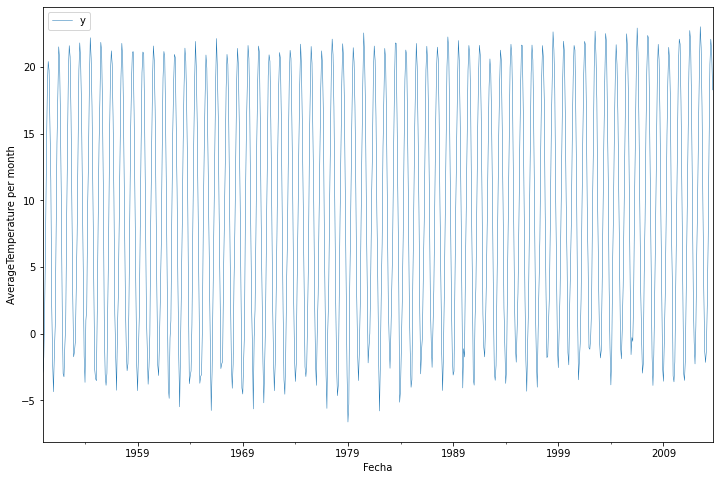

In [20]:
ax = usa.plot(y='y',figsize=figsize,linewidth=0.5)
ax.set_ylabel('AverageTemperature per month')
ax.set_xlabel('Fecha')

plt.show();

###### Comentar sobre la primera grafica

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [22]:
result = seasonal_decompose(usa['y'], model='additive', period=12)

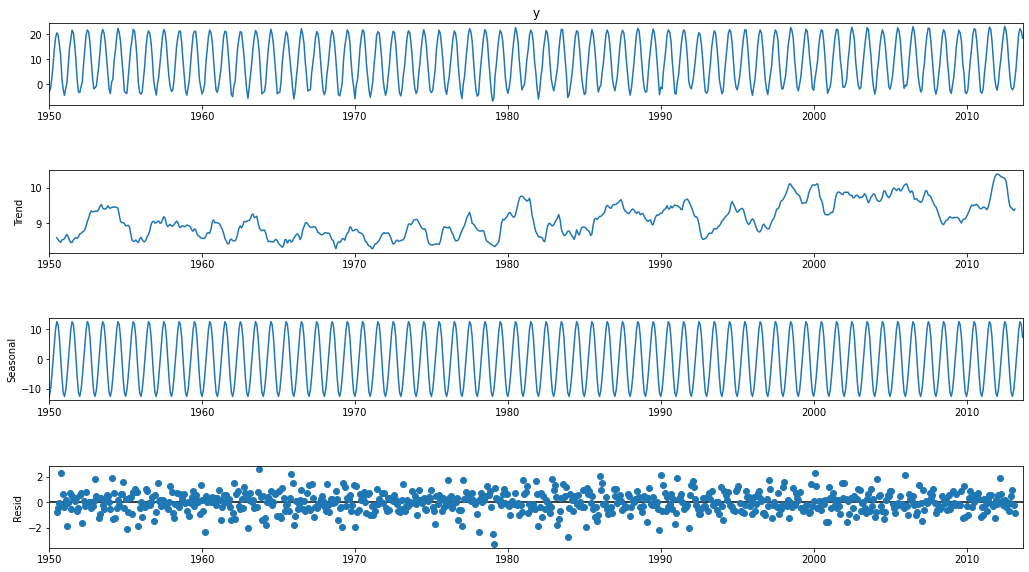

In [23]:
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
#fig.tight_layout()
plt.show()

##### Descomponga la serie en sus componentes. Teniendo en cuenta el diagrama de la serie y sus componentes discuta si es posible hablar de estacionalidad.
##### Determine si es necesario transformar la serie. Explique.

## ANALISIS DF CHINA
#### Grafica de todos los valores en el df de CHINA

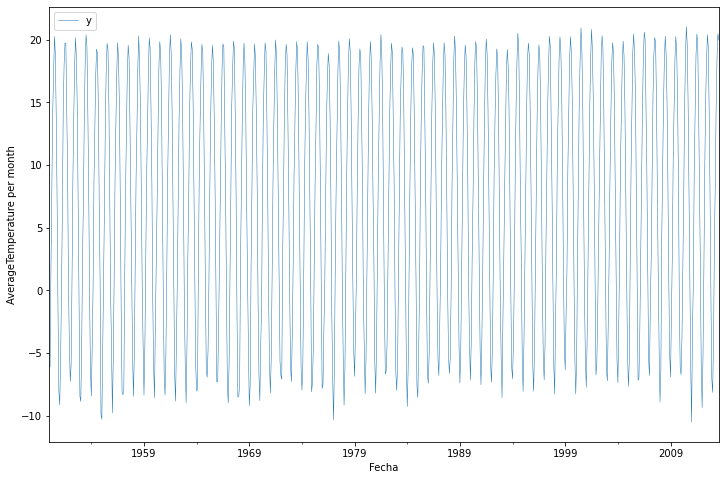

In [24]:
ax = china.plot(x='ds', y='y',figsize=figsize,linewidth=0.5)
ax.set_ylabel('AverageTemperature per month')
ax.set_xlabel('Fecha')

plt.show();

In [25]:
result = seasonal_decompose(china['y'], model='additive', period=12)

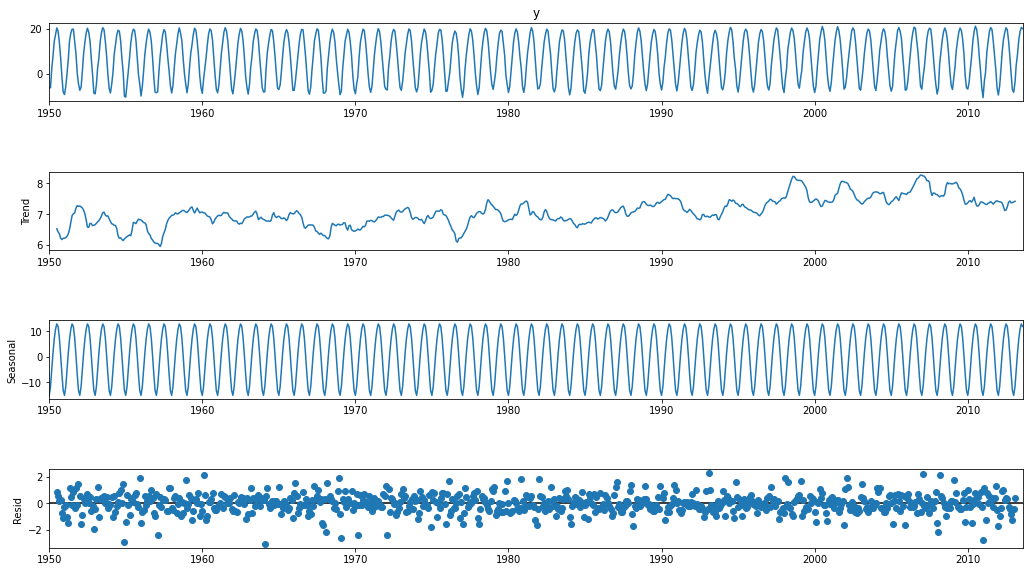

In [26]:
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
#fig.tight_layout()
plt.show()

##### Descomponga la serie en sus componentes. Teniendo en cuenta el diagrama de la serie y sus componentes discuta si es posible hablar de estacionalidad.
##### Determine si es necesario transformar la serie. Explique.

## ANALISIS DF RUSSIA

#### Grafica de todos los valores en el df de RUSSIA

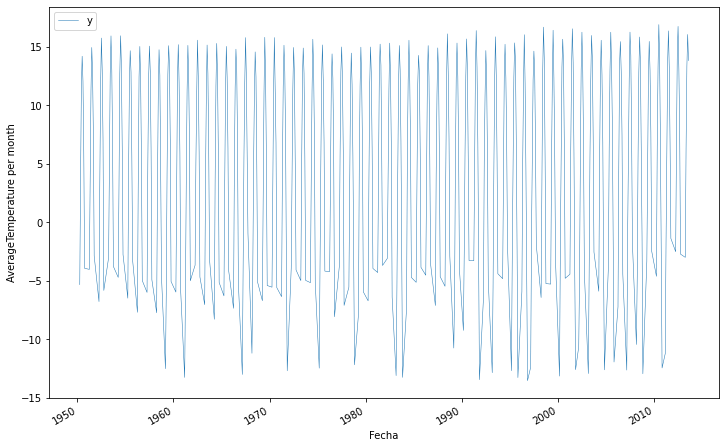

In [27]:
ax = rusia.plot(x='ds', y='y',figsize=figsize,linewidth=0.5)
ax.set_ylabel('AverageTemperature per month')
ax.set_xlabel('Fecha')

plt.show();

In [28]:
result = seasonal_decompose(rusia['y'], model='additive', period=12)

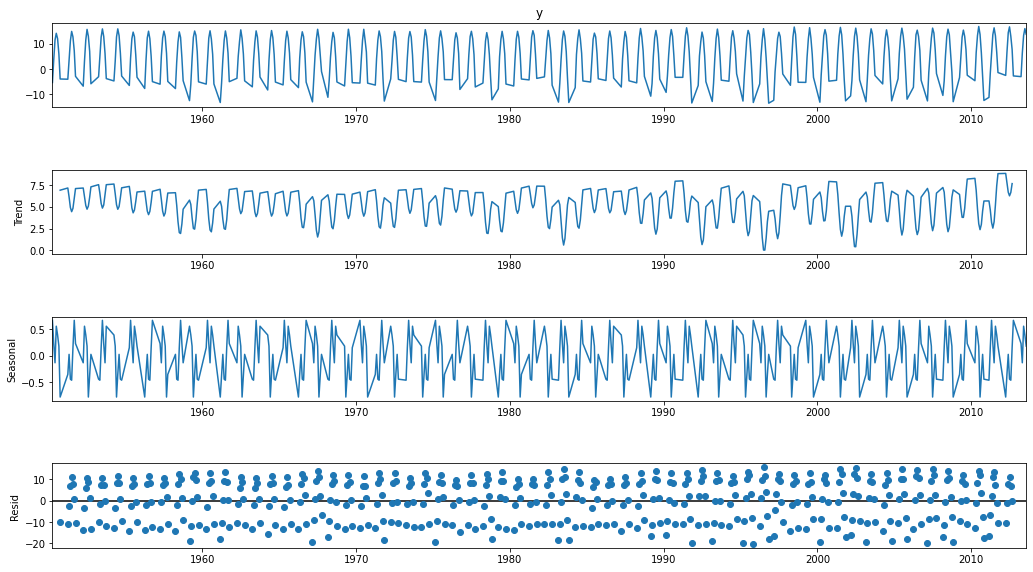

In [29]:
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
#fig.tight_layout()
plt.show()

In [30]:
df.shape

(178278, 4)

##### Descomponga la serie en sus componentes. Teniendo en cuenta el diagrama de la serie y sus componentes discuta si es posible hablar de estacionalidad.
##### Determine si es necesario transformar la serie. Explique.

## ANALISIS DF INDIA
#### Grafica de todos los valores en el df de INDIA

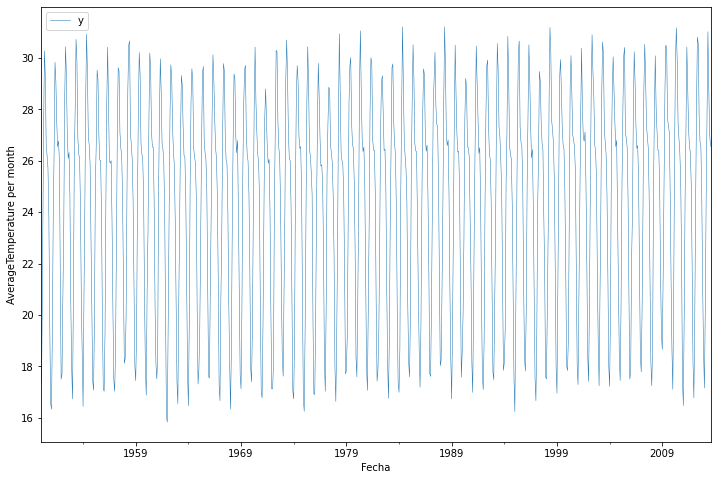

In [31]:
ax = india.plot(x='ds', y='y',figsize=figsize,linewidth=0.5)
ax.set_ylabel('AverageTemperature per month')
ax.set_xlabel('Fecha')

plt.show();

In [32]:
result = seasonal_decompose(india['y'], model='additive', period=12)

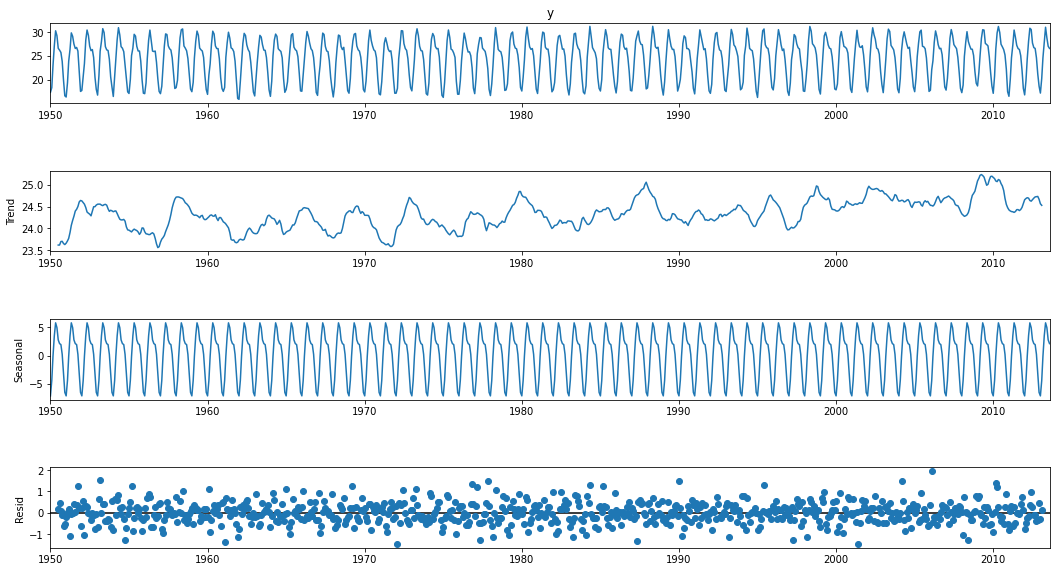

In [33]:
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
#fig.tight_layout()
plt.show()

##### Descomponga la serie en sus componentes. Teniendo en cuenta el diagrama de la serie y sus componentes discuta si es posible hablar de estacionalidad.
##### Determine si es necesario transformar la serie. Explique.

## ANALISIS DF JAPAN
#### Grafica de todos los valores en el df de JAPAN

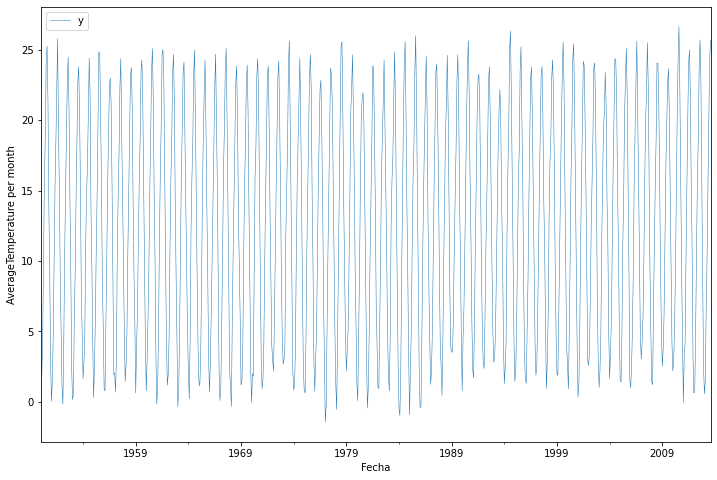

In [34]:
ax = japon.plot(x='ds', y='y',figsize=figsize,linewidth=0.5)
ax.set_ylabel('AverageTemperature per month')
ax.set_xlabel('Fecha')

plt.show();

In [35]:
result = seasonal_decompose(japon['y'], model='additive', period=12)

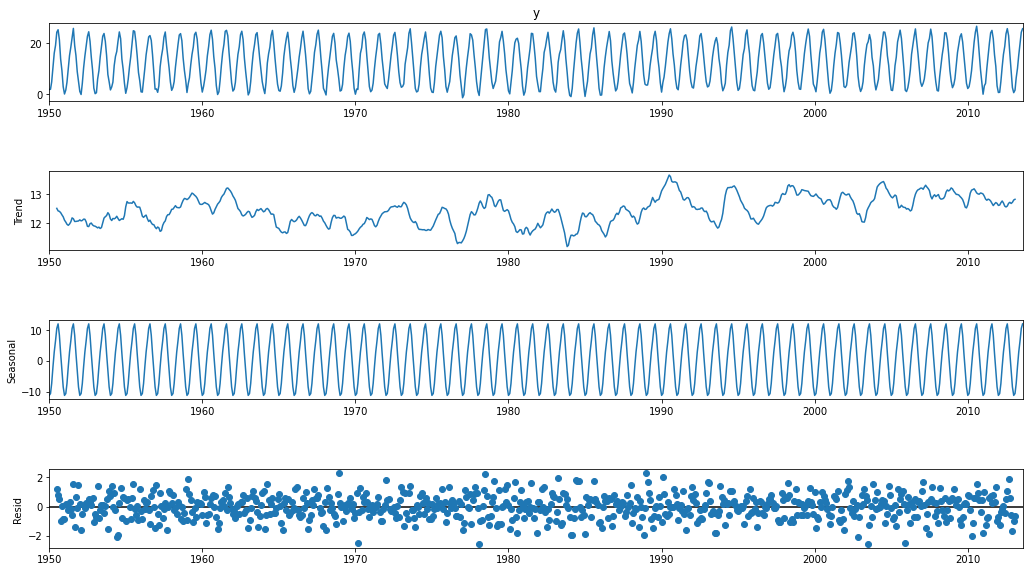

In [36]:
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
#fig.tight_layout()
plt.show()

##### Descomponga la serie en sus componentes. Teniendo en cuenta el diagrama de la serie y sus componentes discuta si es posible hablar de estacionalidad.
##### Determine si es necesario transformar la serie. Explique.

# Uso del Modelo Arima y Prophet

## USA
##### ARIMA MODEL

In [37]:
# Dickey_Fuller_test
Dickey_Fuller_test(usa.y)

ADF Statistic: -3.965715
p-value: 0.001601
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [38]:
train, test,n_periods_val = split_train_test(usa)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=3524.761, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4541.855, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3670.527, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4539.881, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=3730.914, Time=0.13 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=3.44 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=3428.788, Time=1.24 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=7.11 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=3503.371, Time=1.22 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3429.458, Time=1.04 sec
 ARIMA(2,1,1)(0,0,2)[12] intercept   : AIC=3413.925, Time=1.45 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=3527.738, Time=0.81 sec
 ARIMA(2,1,1)(1,0,2)[12] intercept   : AIC=2228.862, Time=4.89 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept

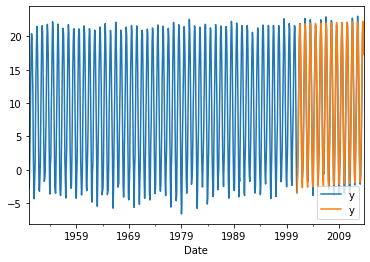

In [39]:
usa_model,usa_arima_prediction = arima_model(usa,train, test,n_periods_val)

##### Prophet

21:26:38 - cmdstanpy - INFO - Chain [1] start processing
21:26:38 - cmdstanpy - INFO - Chain [1] done processing


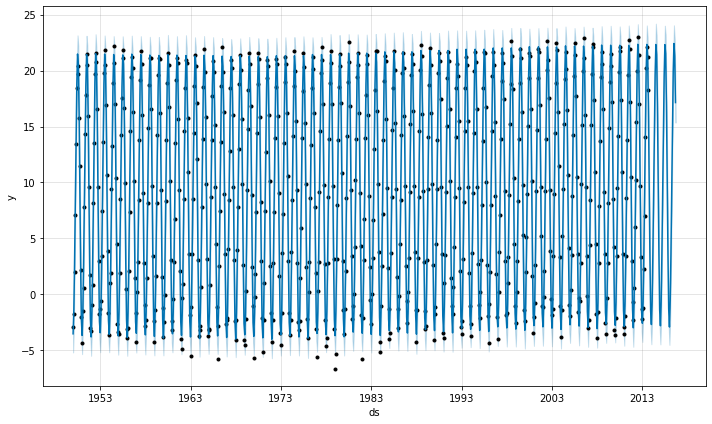

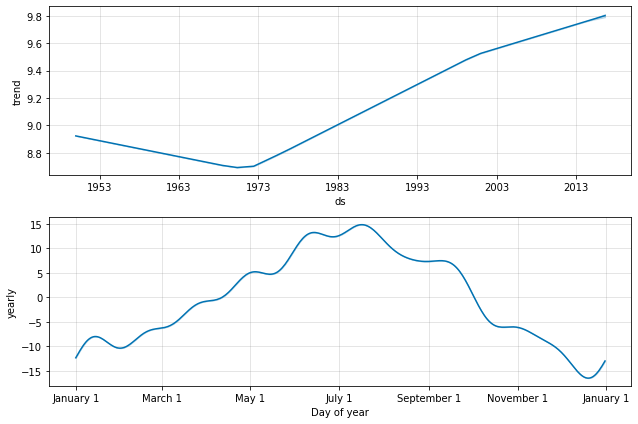

In [40]:
usa_model_P,prediction_usa,future_date_usa = Prophet_model(usa)

## CHINA
##### ARIMA MODEL

In [41]:
# Dickey_Fuller_test
Dickey_Fuller_test(china.y)

ADF Statistic: -4.133385
p-value: 0.000853
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [42]:
train, test,n_periods_val = split_train_test(china)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=3598.332, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4686.373, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3781.142, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4684.406, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=3782.341, Time=0.12 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=3.00 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=3464.695, Time=1.39 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=8.50 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=3549.324, Time=1.77 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3462.711, Time=1.06 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3609.809, Time=0.30 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=2193.963, Time=5.08 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.65 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : 

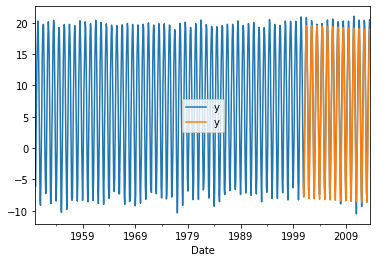

In [43]:
china_model,china_arima_prediction = arima_model(china,train, test,n_periods_val)

##### Prophet

21:30:42 - cmdstanpy - INFO - Chain [1] start processing
21:30:42 - cmdstanpy - INFO - Chain [1] done processing


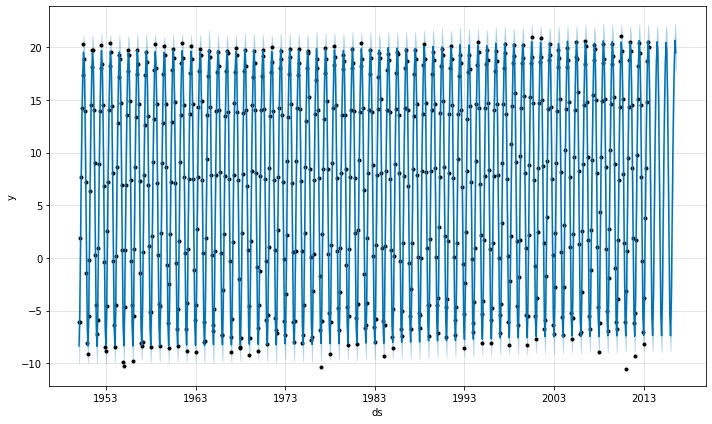

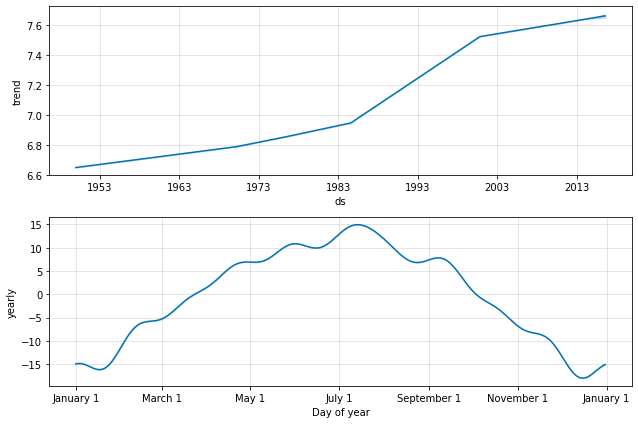

In [44]:
china_model_P,prediction_china,future_date_china = Prophet_model(china)

## RUSIA
##### ARIMA MODEL

In [45]:
# Dickey_Fuller_test
Dickey_Fuller_test(rusia.y)

ADF Statistic: -6.090629
p-value: 0.000000
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570


In [46]:
train, test,n_periods_val = split_train_test(rusia)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=2865.284, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3205.685, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2925.017, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2869.969, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3203.700, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2917.897, Time=0.12 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=2857.558, Time=0.54 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2857.586, Time=0.34 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=2848.333, Time=1.46 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=2854.861, Time=0.91 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=2821.090, Time=1.85 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=2844.720, Time=1.84 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=2820.162, Time=1.44 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=2846.460, Time=1.71 sec
 ARIMA(0,1,1)(2,0,1

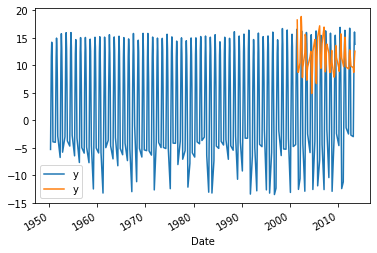

In [47]:
rusia_model,rusia_arima_prediction = arima_model(rusia,train, test,n_periods_val)

##### Prophet

21:31:19 - cmdstanpy - INFO - Chain [1] start processing
21:31:20 - cmdstanpy - INFO - Chain [1] done processing


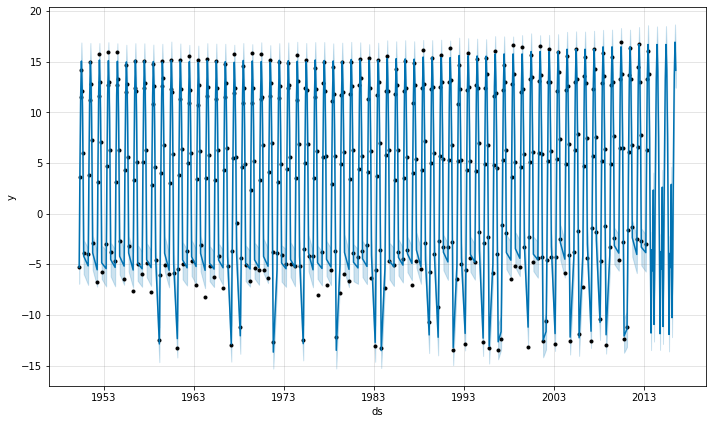

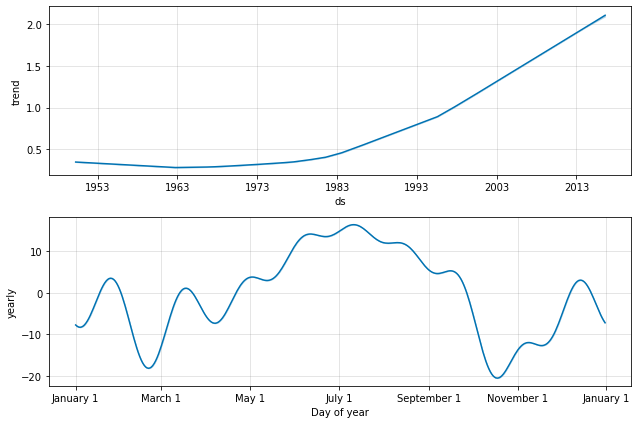

In [48]:
rusia_model_P,prediction_rusia,future_date_rusia = Prophet_model(rusia)

## INDIA
##### ARIMA MODEL

In [49]:
# Dickey_Fuller_test
Dickey_Fuller_test(india.y)

ADF Statistic: -6.053467
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [50]:
train, test,n_periods_val = split_train_test(india)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=2898.847, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3634.629, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2934.225, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3632.646, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=3102.117, Time=0.10 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=4.03 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=2711.210, Time=1.20 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=5.75 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2719.848, Time=1.32 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=2709.803, Time=0.87 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2911.769, Time=0.29 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=3.80 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=2.03 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=2

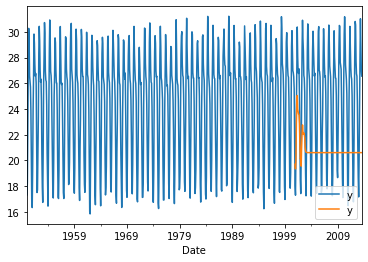

In [51]:
india_model,india_arima_prediction = arima_model(india,train, test,n_periods_val)

##### Prophet

21:32:27 - cmdstanpy - INFO - Chain [1] start processing
21:32:27 - cmdstanpy - INFO - Chain [1] done processing


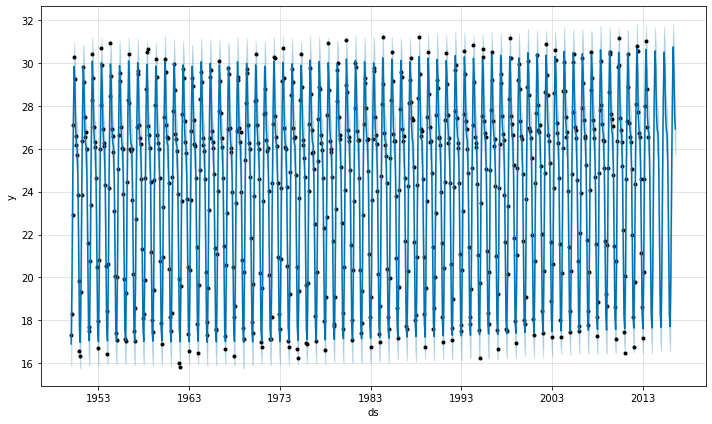

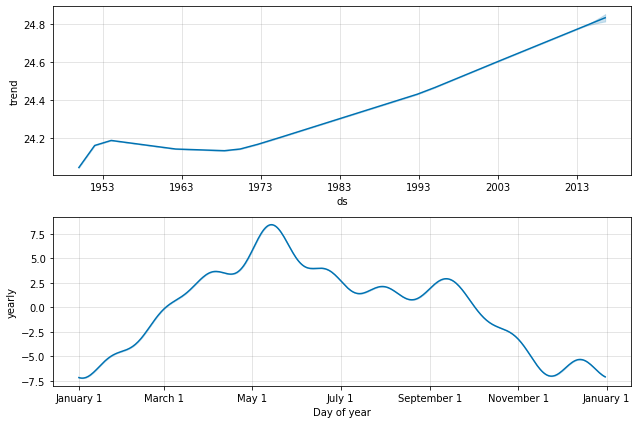

In [52]:
india_model_P,prediction_india,future_date_india = Prophet_model(india)

## JAPON
##### ARIMA MODEL

In [53]:
# Dickey_Fuller_test
Dickey_Fuller_test(japon.y)

ADF Statistic: -5.310943
p-value: 0.000005
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [54]:
train, test,n_periods_val = split_train_test(japon)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=3489.732, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4406.269, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3612.911, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4404.309, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=3669.485, Time=0.11 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.90 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=3358.182, Time=1.15 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=5.10 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=3402.515, Time=1.37 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3356.406, Time=0.99 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3491.489, Time=0.30 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=3.89 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.88 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=3

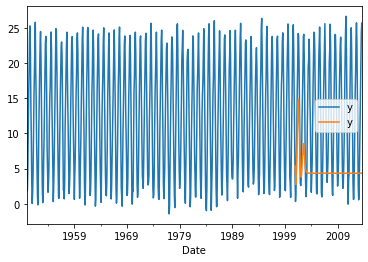

In [55]:
japon_model,japon_arima_prediction = arima_model(japon,train, test,n_periods_val)

##### Prophet

21:33:03 - cmdstanpy - INFO - Chain [1] start processing
21:33:03 - cmdstanpy - INFO - Chain [1] done processing


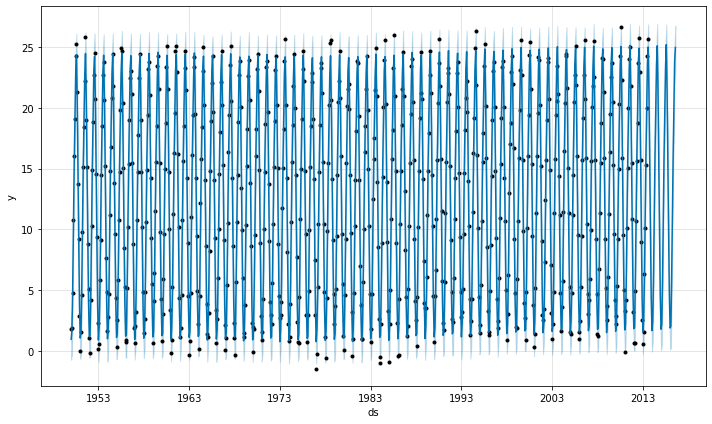

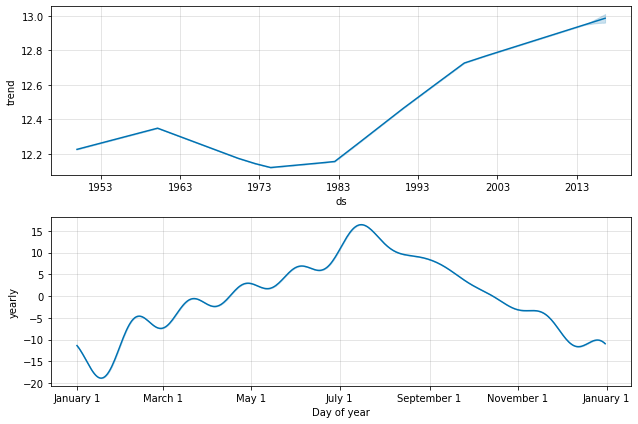

In [56]:
japon_model_P,prediction_japon,future_date_japon = Prophet_model(japon)

In [57]:
len(japon)

764

In [58]:
#get the predict values for the df 
prediction_japon.iloc[764:].head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
764,2013-09-01,12.942963,19.610093,23.064190,12.942963,12.942963,8.383676,8.383676,8.383676,8.383676,8.383676,8.383676,0.0,0.0,0.0,21.326639
765,2013-10-01,12.944155,13.622844,17.107095,12.944123,12.944206,2.417101,2.417101,2.417101,2.417101,2.417101,2.417101,0.0,0.0,0.0,15.361256
766,2013-11-01,12.945387,8.027147,11.559604,12.945064,12.945611,-3.142649,-3.142649,-3.142649,-3.142649,-3.142649,-3.142649,0.0,0.0,0.0,9.802737
767,2013-12-01,12.946579,2.541554,6.199356,12.945915,12.947124,-8.530623,-8.530623,-8.530623,-8.530623,-8.530623,-8.530623,0.0,0.0,0.0,4.415955
768,2014-01-01,12.947810,-0.041635,3.651101,12.946751,12.948689,-11.261880,-11.261880,-11.261880,-11.261880,-11.261880,-11.261880,0.0,0.0,0.0,1.685930


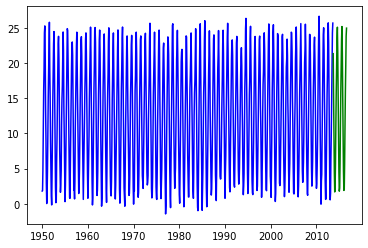

In [59]:
#plt.plot(japon.y)
#plt.plot(prediction_japon.yhat)
plt.plot(japon.ds, japon.y, 'b') # plotting t, b separately 
plt.plot(prediction_japon.iloc[764:].ds, prediction_japon.iloc[764:].yhat, 'g') # plotting t, c separately 
plt.show()

### Informacion de Guatemala

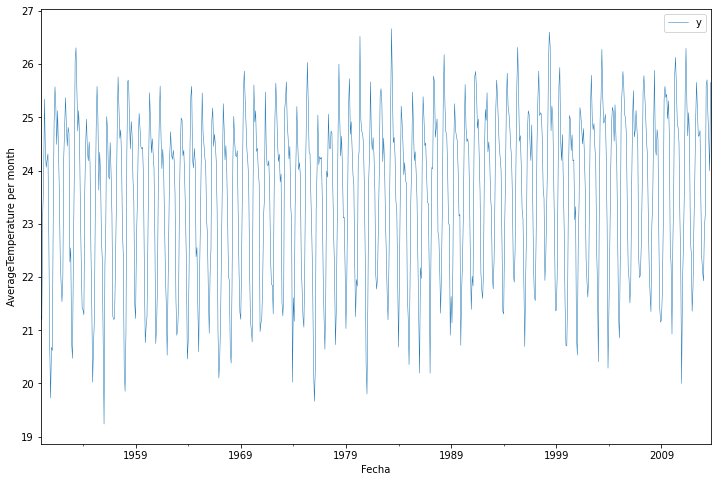

In [60]:
ax = guate.plot(y='y',figsize=figsize,linewidth=0.5)
ax.set_ylabel('AverageTemperature per month')
ax.set_xlabel('Fecha')

plt.show();

###### Comentar sobre la primera grafica

### Bibliografia

In [61]:
result = seasonal_decompose(guate['y'], model='additive', period=12)

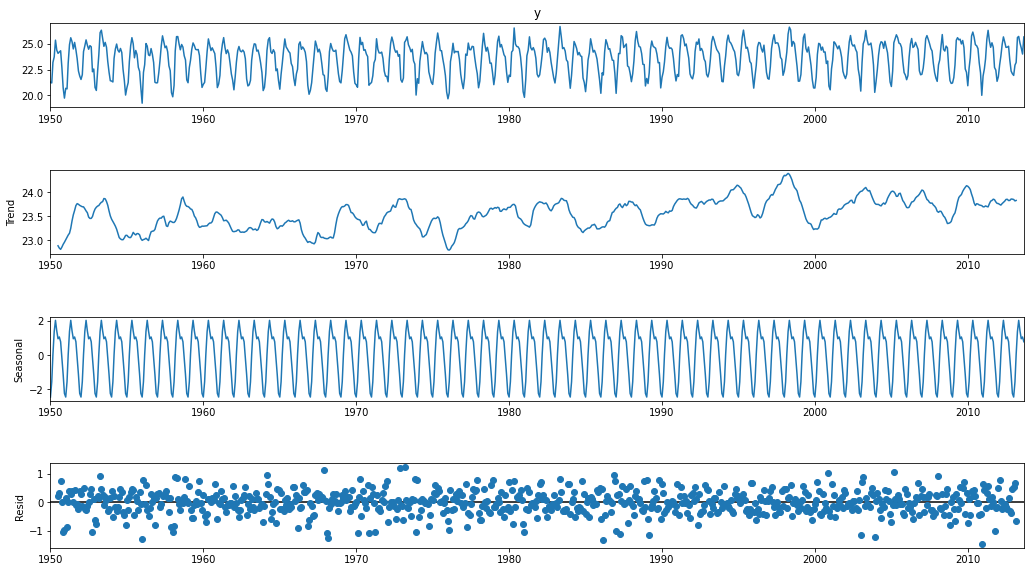

In [62]:
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
#fig.tight_layout()
plt.show()

##### Descomponga la serie en sus componentes. Teniendo en cuenta el diagrama de la serie y sus componentes discuta si es posible hablar de estacionalidad.
##### Determine si es necesario transformar la serie. Explique.

# Uso del Modelo Arima y Prophet

## Guatemala
##### ARIMA MODEL

In [63]:
# Dickey_Fuller_test
Dickey_Fuller_test(guate.y)

ADF Statistic: -5.537003
p-value: 0.000002
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [64]:
train, test,n_periods_val = split_train_test(guate)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1966.839, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2256.816, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1653.867, Time=0.37 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1965.506, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2254.839, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2151.197, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.12 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.56 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1964.841, Time=0.27 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=3.59 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1726.943, Time=0.18 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1609.956, Time=0.54 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=2150.793, Time=0.07 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.49 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : 

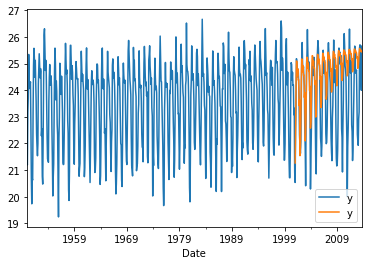

In [65]:
guate_model,guate_arima_prediction = arima_model(guate,train, test,n_periods_val)

##### Prophet

22:14:45 - cmdstanpy - INFO - Chain [1] start processing
22:14:45 - cmdstanpy - INFO - Chain [1] done processing


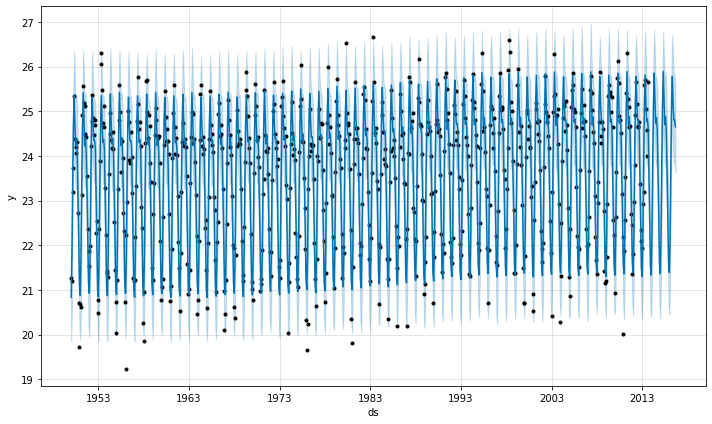

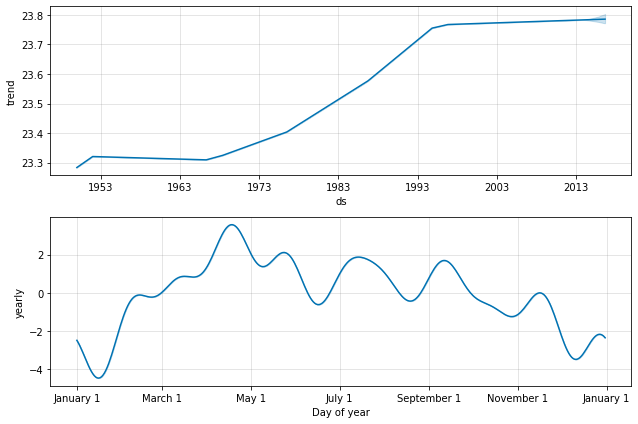

In [66]:
guate_model_P,prediction_guate,future_date_guate = Prophet_model(guate)

In [67]:
len(guate)

765

In [68]:
#get the predict values for the df 
prediction_guate.iloc[764:].head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
764,2013-09-01,23.782706,23.683766,25.590514,23.782706,23.782706,0.830135,0.830135,0.830135,0.830135,0.830135,0.830135,0.0,0.0,0.0,24.612841
765,2013-10-01,23.782781,22.647096,24.626259,23.782781,23.782781,-0.145097,-0.145097,-0.145097,-0.145097,-0.145097,-0.145097,0.0,0.0,0.0,23.637684
766,2013-11-01,23.782859,21.720711,23.622283,23.782844,23.782879,-1.125276,-1.125276,-1.125276,-1.125276,-1.125276,-1.125276,0.0,0.0,0.0,22.657583
767,2013-12-01,23.782934,20.527254,22.476429,23.782816,23.783048,-2.261159,-2.261159,-2.261159,-2.261159,-2.261159,-2.261159,0.0,0.0,0.0,21.521775
768,2014-01-01,23.783012,20.386754,22.330090,23.782719,23.783270,-2.450781,-2.450781,-2.450781,-2.450781,-2.450781,-2.450781,0.0,0.0,0.0,21.332231


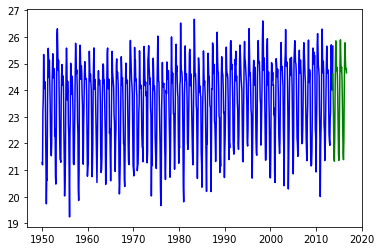

In [69]:
#plt.plot(japon.y)
#plt.plot(prediction_japon.yhat)
plt.plot(guate.ds, guate.y, 'b') # plotting t, b separately 
plt.plot(prediction_guate.iloc[764:].ds, prediction_guate.iloc[764:].yhat, 'g') # plotting t, c separately 
plt.show()

https://climatetrade.com/which-countries-are-the-worlds-biggest-carbon-polluters/